Plan
kmeans
svm
crossval
knn
speed?

# Classification
As it's seen in the unsupervised element of the portfolio, we can group points by their similarity and label them by their belonging to a certain cluster.
When we are given cluster labels and their centers, like we get from the k-means or any other way of clustering, we can also predict what a new point may be similar to.

### In this part I will classify new points using k-means classification.

In [195]:
# Imports block
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from unsupervised.funcs_spectral_clustering import full_kmeans
from scipy.spatial import distance
from sklearn import linear_model
from sklearn.svm import SVC
from supervised.funcs_classification import find_cluster_label
from funcs_classification import compute_mse, mean_centered, get_proj1, get_proj2, ten_fold
from supervised.funcs_classification import plot_svc_decision_function
from supervised.funcs_classification import random_coords


Consider this dataset:

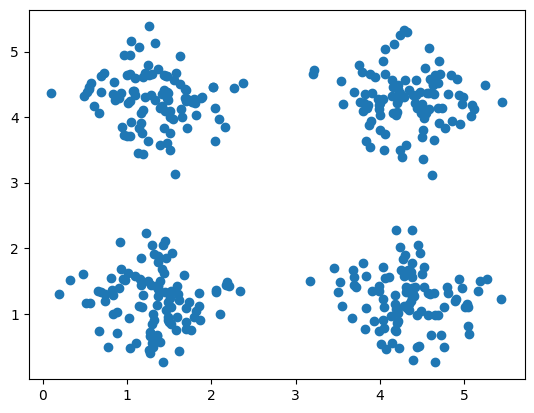

In [95]:
# Data import block
data1_pd = pd.read_csv("hw6data.csv", sep=",", header=None)
data1_np = pd.DataFrame.to_numpy(data1_pd)

# Glance over the data
plt.scatter(data1_np[:,0], data1_np[:,1])

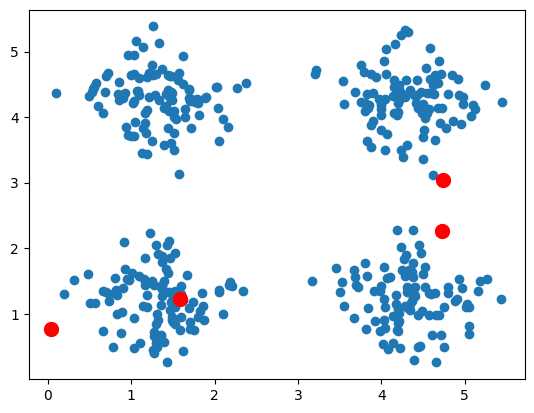

In [184]:
# Generate 4 random points to classify
xs, ys = random_coords(data1_np, 4)

plt.scatter(data1_np[:,0], data1_np[:,1])
plt.scatter(xs, ys, c = "red", s = 100)

Run k-means on the data to define clusters

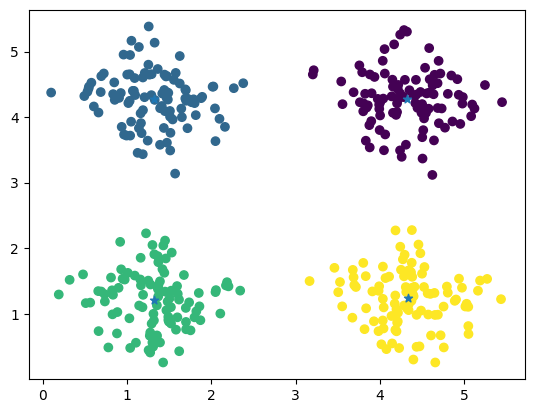

In [185]:
labels, centers = full_kmeans(data1_np, 4)
plt.scatter(data1_np[:, 0], data1_np[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker="*")

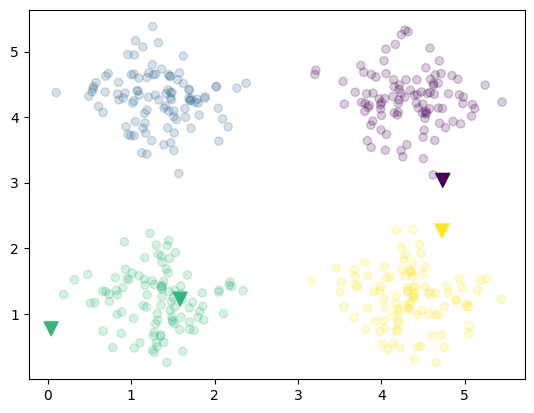

In [190]:
# Finds labels for random points to test the classification
labeled_rand_points = find_cluster_label(xs, ys, centers[:,:2])

plt.scatter(data1_np[:, 0], data1_np[:, 1], c=labels, alpha=.2)
plt.scatter(labeled_rand_points[:, 0], labeled_rand_points[:, 1], c=labeled_rand_points[:,2].astype(int), marker="v", s=100)

Now, knowing how the classificstion works, let's try out other way to classify data.

### SVM
Given that this data already has labels, that won't get determined by clustering, we will use Support Vector Machine, implemented using three kernels, to determine how to split it.
Support Vector Machine, unlike the spectral clustering, and k-means, uses the "coloring" of the points to determine predict what pattern the data follows and how to split it.

This dataset has three columns: an `x`-coordinate, a `y`-coordinate, and a label (either 1 or 0).
Our goal is to determine which kernel for SVM leads to the best classification of
the data into the two classes.

[[4.91788062 4.57868397 0.        ]
 [3.67814635 1.66922296 1.        ]
 [2.34275482 1.35275014 0.        ]
 [0.83404434 1.28955105 0.        ]
 [4.18292738 0.75313448 1.        ]
 [4.3205039  1.08339168 1.        ]
 [1.49052374 0.90347756 0.        ]]


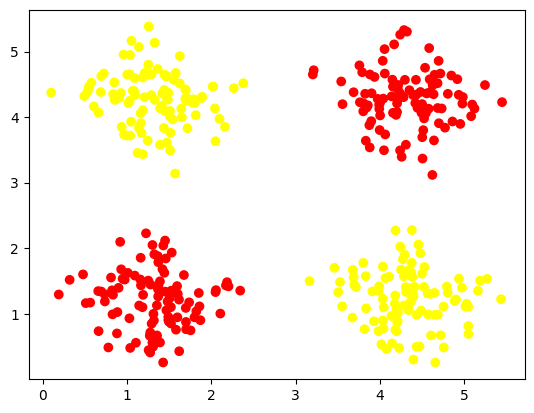

In [230]:
print(data1_np[:7])
plt.scatter(data1_np[:,0], data1_np[:,1], c = data1_np[:,2], cmap="autumn")

We will visualize how two different projections represent our data.
Our investigations will be conducted on both the mean-centered and non-mean-centered data.


First, mean-center the data:

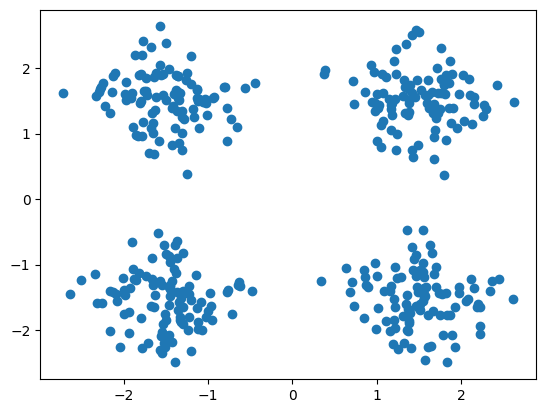

In [231]:
data1_ctd = mean_centered(data1_np)
plt.scatter(data1_ctd[:, 0], data1_ctd[:, 1])

A very general idea behind a kernel is to replace the process of projecting data to a higher space. After that, we will compute the SVM

In kernel SVM, our goal is to project our data into a higher dimensional
space such that the classes are well separated.

Construct two different projections that move 2D to 3D:
* Projection 1: $(x_1,x_2)$ --> $(x_1, x_2, \exp{-(x_1^2 +x_2^2)})$
* Projection 2: $(x_1,x_2)$ --> $(x_1^2,\sqrt{2}x_1x_2, x_2^2)$

Create four 3-dimensional plots:
* Projection 1 on data **without** mean-centering
* Projection 1 on **mean-centered** data
* Projection 2 on data **without** mean-centering
* Projection 2 on **mean-centered** data

### Projection 1

_Note 1:_ Projection 1 is the mental picture that many use to understand the
_radial basis kernel,_ see [this example](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html#Beyond-linear-boundaries:-Kernel-SVM). However, we note that
projection underlying the RBF is a projection to infinite space (see
discussion [here](Use Gaussian RBF kernel for mapping of 2D data to 3D) and
[here](https://stats.stackexchange.com/questions/109300/applying-an-rbf-kernel-first-and-then-train-using-a-linear-classifier) for more information).

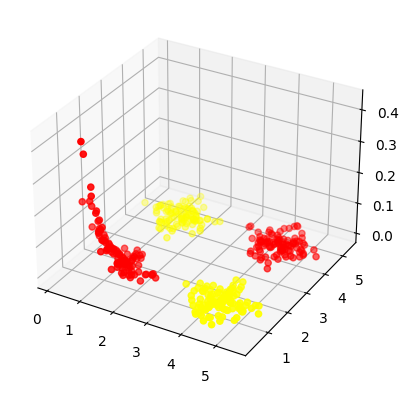

In [232]:
# * Projection 1 on data **without** mean-centering
proj1_no_ct = get_proj1(data1_np)

# 3D plot for Projection 1 on data **without** mean-centering
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(proj1_no_ct[:, 0], proj1_no_ct[:, 1], proj1_no_ct[:, 2], c=data1_np[:, 2], cmap='autumn')


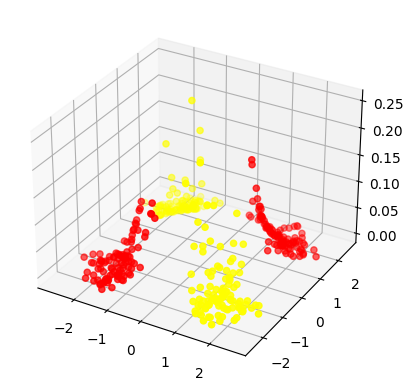

In [233]:
# * Projection 1 on **mean-centered** data
proj1_ctd = get_proj1(data1_ctd)

# 3D plot for Projection 1 on data **with** mean-centering
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter(proj1_ctd[:,0], proj1_ctd[:,1], proj1_ctd[:,2], c = data1_np[:,2], cmap = 'autumn')

### Projection 2
_Note 2:_ Projection 2 is similar to the projection underlying the
_polynomial kernel of degree 2._ To learn more about this kernel, see
[this wikipedia page](https://en.wikipedia.org/wiki/Polynomial_kernel).

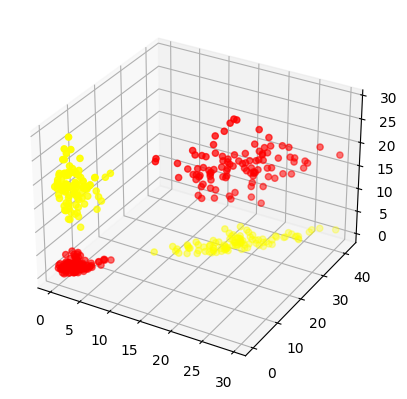

In [234]:
# * Projection 2 on data **without** mean-centering
proj2_no_ct = get_proj2(data1_np)

# 3D plot for Projection 2 on data **without** mean-centering
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter(proj2_no_ct[:,0], proj2_no_ct[:,1], proj2_no_ct[:,2], c = data1_np[:,2], cmap = 'autumn')

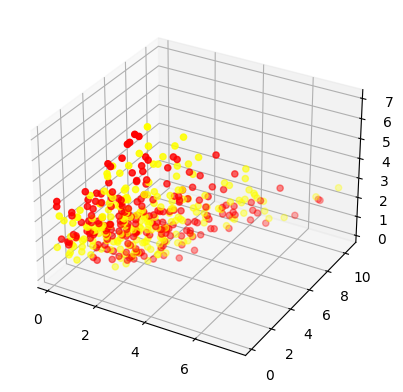

In [235]:
# * Projection 2 on **mean-centered** data
proj2_ctd = get_proj2(data1_ctd)

# 3D plot for Projection 2 on data **with** mean-centering
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter(proj2_ctd[:,0], proj2_ctd[:,1], proj2_ctd[:,2], c = data1_np[:,2], cmap = 'autumn')

With a human eye, it's visible that the more clear data separation occurs with projection 1 and that there's a common pattern for this projection applied to mean centered data.
That is, the 4 batches of data are clearly split and symmetrical in a relation to the origin.

# Cross-val
### To find the best kernel to build a model for data classification, we will implement a cross validation algorithm.

K-fold CV divides data into k folds, applies the kernel to the output variable, given the input data -- x,y coordinates in our case. Then it iterates over each "fold", using it as test data and the rest of data for training, to then compare it to an actual label for each datapoint. As an output we get a cross-validated error, which would be minimal for the best model.

Select one of the kernels as the appropriate one using the mean squared error output from ten_fold


In [236]:
# TODO fix ten_fold so it splits data properly
print(ten_fold(data1_np, 'rbf', True),  "RBF kernel SVM, centered")
print(ten_fold(data1_np, 'rbf', False),  "RBF kernel SVM, non-centered")
print(ten_fold(data1_np, 'poly', True),  "Poly kernel SVM, centered")
print(ten_fold(data1_np, 'poly', False),  "Poly kernel SVM, non-centered")
print(ten_fold(data1_np, 'linear', True),  "linear kernel SVM, centered")
print(ten_fold(data1_np, 'linear', False),  "linear kernel SVM, non-centered")


0.5549999999999999 RBF kernel SVM, centered
0.5549999999999999 RBF kernel SVM, non-centered
0.0 Poly kernel SVM, centered
0.0075000000000000015 Poly kernel SVM, non-centered
0.2544843972014243 linear kernel SVM, centered
0.2544843972014243 linear kernel SVM, non-centered


Inferring from the mean test error cross-evaluated by 10-fold CV, best kernel to use is polynomial kernel of degree 2 with centered data.

Once kernel is selected, we use all data to tune the SVM with selected kernel.

In [237]:
# Tunes the model
line_svm = SVC(kernel='poly', degree=2, gamma='auto')
mod_i = line_svm.fit(data1_np[:, :2], data1_np[:, 2])

Plot decision boundary and the margins.

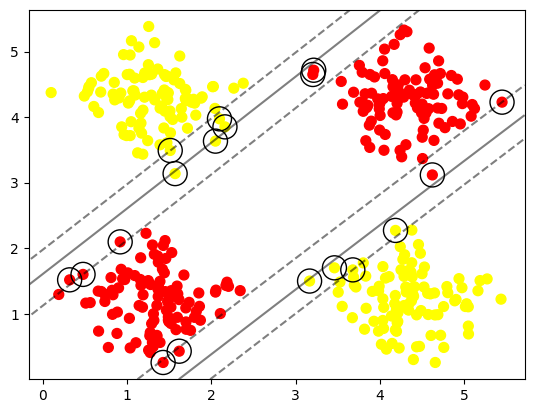

In [238]:
# Plots datapoints from the train/test set with the SVM
plt.scatter(data1_np[:, 0], data1_np[:, 1], c=data1_np[:,2], s=50, cmap='autumn')
plot_svc_decision_function(line_svm, plot_support=True)

Selected SVM is to be a good fit for the data -- there are only few points violating the margin and boundary violations.

To validate our model, use additional data that's generated similarly to input data:

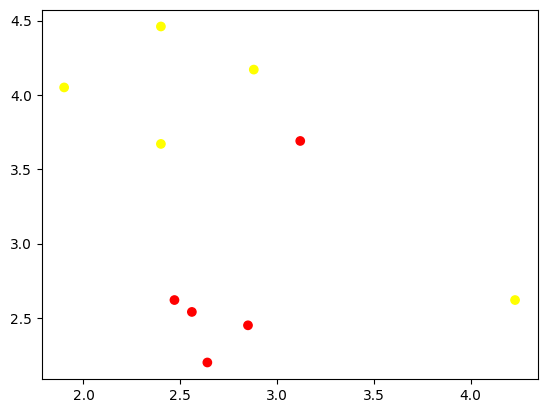

In [240]:
# Reading data from the test.csv file and plotting it.
data_test = pd.read_csv("test.csv", sep=",", header=None)
data_test_np = pd.DataFrame.to_numpy(data_test)

plt.scatter(data_test_np[:,0], data_test_np[:,1], c = data_test_np[:,2], cmap="autumn")

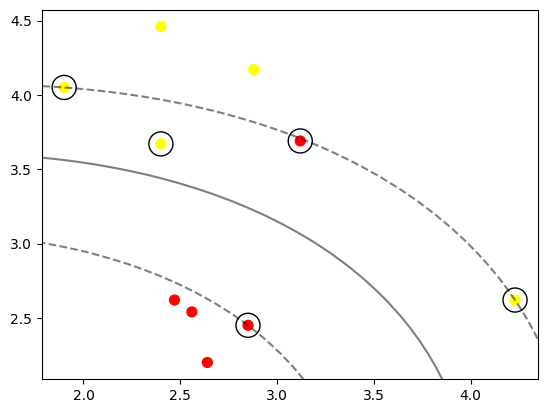

In [241]:
# Uses model to predict the classes for the data points in the validation set, applying the determined kernel

line_poly = SVC(kernel='poly', degree=2, gamma='auto')
line_poly.fit(data_test_np[:, :2], data_test_np[:, 2])

# Plot datapoints from the validation set with the SVM
plt.scatter(data_test_np[:, 0], data_test_np[:, 1], c=data_test_np[:, 2], s=50, cmap='autumn')
plot_svc_decision_function(line_poly, plot_support=True)

The selected SVM seems to perform well on the test dataset presenting only one violation of the boundary.

Use _score()_ method to see the mean accuracy on the given test data and labels.

In [245]:
line_poly.fit(data_test_np[:, :2], data_test_np[:, 2]).score(data_test_np[:,:2], data_test_np[:,2])

0.9

0.9 is a very close to 1.0 score, which confirms that this model performs well on data classification.

Because SVM is a supervised learning algorithm, it uses true values for data and needs some form of evaluation, in our case we used cross-validation. While it requires more input, it performs well on data separation allowing for more complex relationships.

# Potentially KNN

In [ ]:
# Supervision classification example -- SVM -- is parametric and can't guess more complex relationships. However more efficient and works for most cases

When given labels, kNN can predict labels even better than the spectral clustering

However it is slower.

kNN is a supervision, therefore needs crossvalidation

Because it is a supervised learning algorithm, we will need some true labels to compare to when we test new data on a prepared model. As well as some measure to let computer know when to stop training.
It can also be a case that data will be classified better if it has some preprocessing -- as mean centering.

The idea behind a kernel is to replace the process of projecting
our data to a higher space and then computing the SVM. In this part, we will
construct two different projections that move 2D to 3D: